<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект.

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее.

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M.
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир
***
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — провести исследовательский анализ данных, который поможет установить параметры, влияющие на цены объекты. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
***
**Последовательность действий**
- Шаг 1. Изучение файла с данными
- Шаг 2. Предобработка данных. Задачи:
  - Найти и изучить пропущенные значения значения в столбцах.
  - Рассмотреть типы данных в каждом столбце. При необходимости произвести замену типа.
  - Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.
- Шаг 3. Добавить в таблицу новые столбцы со следующими параметрами:
  -цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
  - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
  - месяц публикации объявления;
  - год публикации объявления;
  - тип этажа квартиры (значения — «первый», «последний», «другой»);
  - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
- Шаг 4. Провести исследовательский анализ данных:
  1. Изучим перечисленные ниже параметры объектов и построим отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалим их. Например, в столбце `ceiling_height` может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуем обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановим корректное значение. В противном случае удалим редкие и выбивающиеся значения.
  
    **Список параметров:**
      - общая площадь;
      - жилая площадь;
      - площадь кухни;
      - цена объекта;
      - количество комнат;
      - высота потолков;
      - тип этажа квартиры («первый», «последний», «другой»);
      - общее количество этажей в доме;
      - расстояние до центра города в метрах;
      - расстояние до ближайшего парка.
  2. Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.
    - Построим гистограмму.
    - Посчитаем среднее и медиану.
    - В ячейке типа markdown опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
  3. Какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучим, зависит ли цена от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
    
    Построим графики, которые покажут зависимость цены от указанных выше параметров.
  4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
  5. По рассчитаному расстоянию до центра в километрах выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города — построим график изменения средней цены для каждого километра от центра Петербурга.
***
**Описание данных**

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м);
- **balcony** — число балконов;
- **ceiling_height** — высота потолков (м);
- **cityCenters_nearest** — расстояние до центра города (м);
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия);
- **first_day_exposition** — дата публикации;
- **floor** — этаж;
- **floors_total** — всего этажей в доме;
- **is_apartment** — апартаменты (булев тип);
- **kitchen_area** — площадь кухни в квадратных метрах (м²);
- **last_price** — цена на момент снятия с публикации;
- **living_area** — жилая площадь в квадратных метрах (м²);
- **locality_name** — название населённого пункта;
- **open_plan** — свободная планировка (булев тип);
- **parks_around3000** — число парков в радиусе 3 км;
- **parks_nearest** — расстояние до ближайшего парка (м);
- **ponds_around3000** — число водоёмов в радиусе 3 км;
- **ponds_nearest** — расстояние до ближайшего водоёма (м);
- **rooms** — число комнат;
- **studio** — квартира-студия (булев тип);
- **total_area** — общая площадь квартиры в квадратных метрах (м²);
- **total_images** — число фотографий квартиры в объявлении.


In [15]:
#импортируем необходимые библиотеки для работы

import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

pd.options.display.float_format ='{:.1f}'.format
pd.set_option('display.max_columns', None)

Mounted at /content/drive


## Шаг 1. Изучение файла с данными

In [17]:
# откроем полученный датасет
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('drive/MyDrive/datasets_YaP/real_estate_data.csv', sep='\t')

In [18]:
# выведим первые 10 строк датасета
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,False,False,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b>
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b>
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо большое за наводку по максимальному количеству столбцов. Искал, но, к сожалению, сам не смог найти правильного ответа.
</div>

### Предобработка данных

In [ ]:
#Получим информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000'})

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Молодец! Так датафрейм будет более аккуратным
</div>


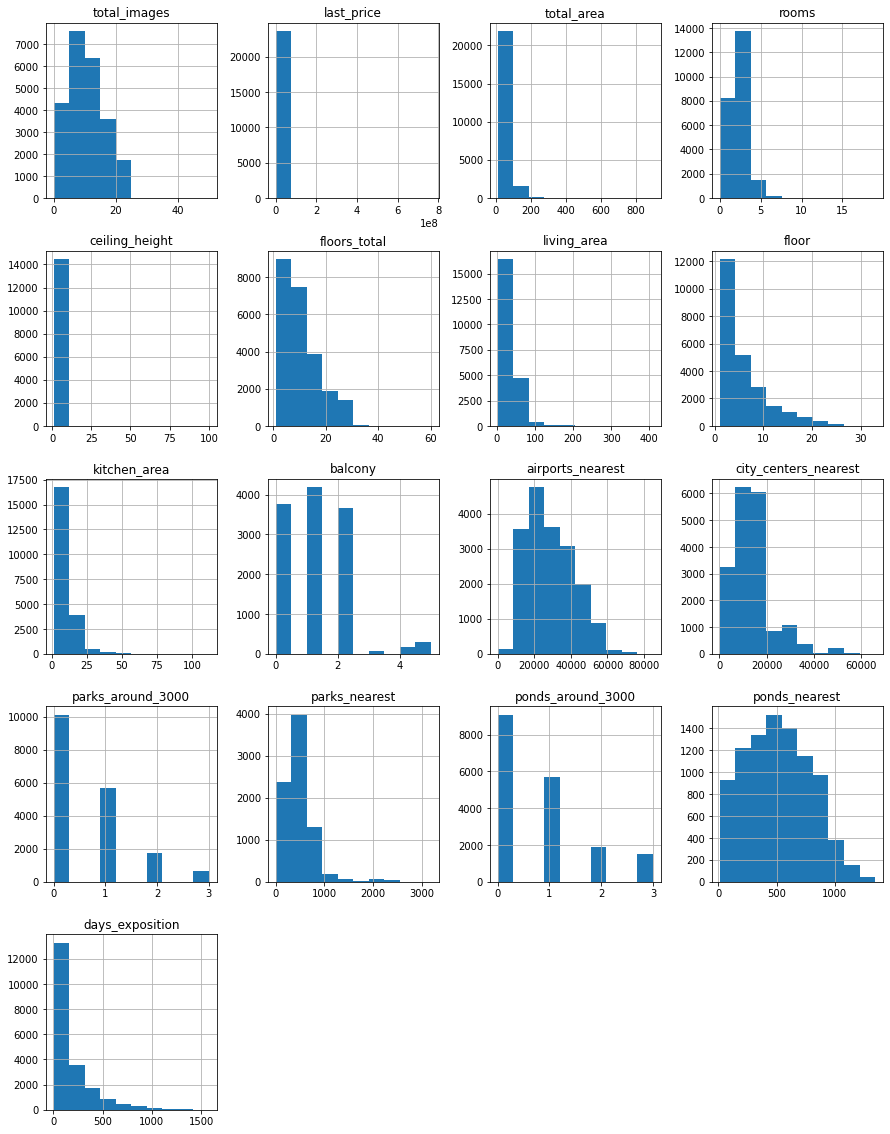

In [ ]:
# выводим гистограммы для числовых столбцов
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Графики построено верно!
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b>
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

In [ ]:
#выведем пустые значения для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

По таблице в 14 колонках имеются пустые значения:
- 'balcony' - если в данной колонке отсутствуют данные, можно сделать вывод, что балкона нет, следовательно все пустые значение можно поменять на 0.0;
- 'parks_around_3000' - если в данной колонке отсутствуют данные, можно сделать вывод, что в радиусе 3км нет парков, следовательно все пустые значения можно поменять на 0.0;
- 'parks_nearest' - если в данной колонке отсутствуют данные, необходимо заполнить медианным значением.
- 'ponds_around_3000' - если в данной колонке отсутствуют данные, можно сделать вывод, что в радиусе 3км нет водоемов, следовательно все пустые значения можно поменять на 0.0;
- 'ponds_nerest' - если в данной колонке отсутствуют данные, необходимо заполнить медианным значением.
- 'days_exposition' - наличие пропусков в данной колонке говорит о том, что объявление еще размещено и актуально. Пустые значения можно заменить на 0.0.
- 'living_area' - заполнить пустые значения колонки можно через нахождение площади посредством колонок 'living_area' и 'total_area'
- 'locality_name' - наличие пропусков в данных строчках сильно не повлияет на анализ, возможно данные строки можно удалить, так как доля от общего числа строк составляет 0,2%.
- 'city_centers_nearest' - наличие пропусков может говорить как о непосредственной близости к центру, а также о максимальной удаленности от центра. Данные можно заполнить медианным значением.
- 'airports_nearest' - наличие пропусков может говорить об отсутствии аэропорта, данные можно заполнить значением 0.0, если строка по локации является единственной и уникальной, если позиция по локации не является уникальной, то взять медианное значение.
- 'ceiling_height' - данные могли забыть внести. Заполняем медианным значением.
- 'floors_total' - данные можно удалить.
- 'is_apartment' - пропуски можно заполнить False
- 'kitchen_area' - заполнить пустые значения колонки можно через нахождение площади посредством колонок 'kitchen_area' и 'total_area'

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

In [ ]:
#заменяем пустые значение в колонке 'balcony'
data['balcony'] = data['balcony'].fillna(0.0)

In [ ]:
#заменяем пустые значение в колонке 'parks_around_3000'
data['parks_around_3000'] = data['parks_around_3000'].fillna(0.0)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b>
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удалил заполнение пустых значений по колонкам 'parks_nearest', 'ponds_nearest', 'airports_nearest'.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

In [ ]:
#заменяем пустые значение в колонке 'ponds_around_3000'
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0.0)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b>
<br>Если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Удалил заполнение пропусков по колонке 'days_exposition'. Объясни, пожалуйста, почему не стоит пропуски в колонке 'days_exposition' заполнять? Я по такой же логике шел, что если нет данных, значит объявление еще актуально и квартира находится на продаже, следовательно значение 0, так как еще нет завершающего количества дней, которое обозначало сколько объявление было актуальным.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Логика верная, но для чего их заполнять на 0? Изменить тип данных можно и без этого, а так это просто лишнее действие)
    
        
    import numpy as np
    df['col'] = np.floor(pd.to_numeric(df['col'], errors='coerce')).astype('Int64')
</div>

In [ ]:
#заменяем пустые значения в колонке 'city_centers_nearest'
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

In [ ]:
#удаляем строки с пустыми значениями в колонке 'locality_name'
data.dropna(subset=['locality_name'], inplace=True)

In [ ]:
#заменяем пустые значения в колонке 'living_area'
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(living_ratio * data['total_area'])

In [ ]:
#заменяем пустые значения в колонке 'kitchen_area'
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_ratio * data['total_area'])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

In [ ]:
#заменяем пустые значения в колонке 'ceiling_height'
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

In [ ]:
#заменяем пустые значения в колонке 'is_apartment'
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [ ]:
#удаляем строки с пустыми значениями в колонке 'floors_total'
data.dropna(subset=['floors_total'], inplace=True)

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.6,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.6,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.6,14.0,90.8,9,False,False,False,27.8,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.6,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,13098.5,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.6,26.0,10.6,6,False,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.6,24.0,40.9,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.2,2018-05-23T00:00:00,1,2.6,27.0,15.4,26,False,False,False,8.8,0.0,посёлок Мурино,NaN,13098.5,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest        0
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

С помощью метода .info() были изучены типы данных колонок. По полученным данным сделаны следующие выводы по колонкам, у которых необходимы заменить тип данных:
- 'first_day_exposition' - колонка с информацией о дате публикации объявления. Необходимо привести к типу datetime.
- 'floors_total' - данные, указанные в колонке, указывают количество этажей. Этажи считаются целыми числами, следовательно, значения необходимо привести к типу int.
- 'is_apartment' - колонка хранит в себе значения, указывающие на логический ответ Правда/Ложь, значения необходимо привести к типу bool
- 'balcony' - данные, указанные в колонке, указывают на количество баклонов, которые в свою очередь считаются целыми числами, следовательно, значения необходимо привести к типу int.
- 'parks_around_3000' - данные, указанные в колонке, указывают на количество парков в окружении квартиры, которые подсчитываются только целыми числами, значения необходимо к типу int.
- 'ponds_around_3000' - данные, указанные в колонке, указывают на количество водоемов в окружении квартиры, которые подсчитываются только целыми числами, значения необходимо к типу int.
- ~~'days_exposition' - данные, указанные в колонке, указывают на количество дней активности объявления на площадке. Данные значения лучше вести целыми числами, по этому необходимо привести к типу int.~~

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Я правильно понял, что мы не переводим колонку 'days_exposition' в int64?
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>По желанию)
</div>

In [ ]:
#заменяем тип данных в колонке 'first_day_exposition' к типу данных datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [ ]:
#заменяем тип данных в колонках 'floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition'
data.astype({ "floors_total": "int64", "balcony": "int64", "parks_around_3000": "int64", "ponds_around_3000": "int64",})

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,90.8,9,False,False,False,27.8,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.8,2017-03-21,3,3.7,5,73.3,3,False,False,False,13.8,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.0,2018-01-15,3,2.6,5,38.0,4,False,False,False,8.5,0,Тосно,NaN,13098.5,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.7,2018-02-11,2,2.6,3,29.7,1,False,False,False,9.9,0,село Рождествено,NaN,13098.5,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.8,2017-03-28,2,3.0,17,43.8,12,False,False,False,23.3,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b>
<br>Методы fillna и astype можно применить к нескольким столбюца одновременно

	df.astype({ "col1": "float64", "col2": "int64"})
<br>Если столбцов более двух, то можно применить цикл for для автоматизации процесса
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Поменял код по замене типа данных колонок одну строку, как было указано в комментарии. Также не переводил в int64 колонку 'days_exposition'.
</div>

In [ ]:
#заменяем тип данных в колонке 'is_apartment'
data['is_apartment'] = data['is_apartment'].astype('bool')

In [ ]:
#проверям выполнение замены типов данных колонок
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [ ]:
#выведим количество уникальных значений по колонке 'locality_name'
data['locality_name'].value_counts()

Санкт-Петербург                                      15651
посёлок Мурино                                         520
посёлок Шушары                                         439
Всеволожск                                             398
Пушкин                                                 369
                                                     ...  
коттеджный посёлок Лесное                                1
деревня Лаврики                                          1
садовое товарищество Новая Ропша                         1
посёлок при железнодорожной станции Приветнинское        1
посёлок Высокоключевой                                   1
Name: locality_name, Length: 364, dtype: int64

In [ ]:
#выведим все уникальные значения по колонке 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В колонке неявные дубликаты можно определить по словам 'поселок' и 'посёлок', 'поселок городского типа' и 'городской поселок' и т.д.
Необходимо привести к единообразию. В значениях колнок заменить букву 'ё' на 'е', 'городской поселок' на 'поселок городского типа'.

In [ ]:
#удаляем неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа', regex=True)

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Супер! Здесь всё верно)
</div>

In [ ]:
#выводим характерные значения по dataframe
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.0,23565.0,23565.0,23565.0,23565.0,23565.0,23565.0,23565.0,23565.0,23565.0,18041.0,23565.0,23565.0,8030.0,23565.0,9036.0,20394.0
mean,9.9,6540058.3,60.3,2.1,2.7,10.7,34.6,5.9,10.5,0.6,28797.1,13937.2,0.5,490.6,0.6,518.3,180.7
std,5.7,10910934.7,35.7,1.1,1.0,6.6,22.4,4.9,6.0,1.0,12632.5,7555.4,0.7,341.6,0.9,278.0,219.7
min,0.0,12190.0,12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,3400000.0,40.0,1.0,2.6,5.0,19.0,2.0,7.0,0.0,18565.0,10935.0,0.0,288.0,0.0,293.0,45.0
50%,9.0,4646000.0,52.0,2.0,2.6,9.0,30.0,4.0,9.0,0.0,26757.0,13098.5,0.0,455.0,0.0,503.0,95.0
75%,14.0,6790000.0,69.7,3.0,2.7,16.0,42.1,8.0,12.0,1.0,37273.0,15237.0,1.0,612.0,1.0,730.0,231.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


In [ ]:
#выводим характерные значения по колонке 'ceiling_height'
data['ceiling_height'].describe()

count   23565.0
mean        2.7
std         1.0
min         1.0
25%         2.6
50%         2.6
75%         2.7
max       100.0
Name: ceiling_height, dtype: float64

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Значения в списке отличаются от среднего на 0.9.
Также в колонке присутствуют аномальные значение, например, 26.0, 100. , 20.0. По данной инфомрации можно сделать вывод, что данные внесены с ошибкой простановки точки в нужном месте.

Необходимо привести аномальные значения к нормальному виду посредством метода where, где, значения удовлетворяющую условию > 10, необходимо поделить на 10. А также удалить строки со значениями < 2.0, так как можно предположить, что потолки высотой меньше 2х метров по стандартам не возможна.

In [ ]:
#приводим значения больше 10 метров к нормальному значению
data['ceiling_height'].where(~(data.ceiling_height > 10.0), other= data.ceiling_height / 10, inplace=True)
#удаляем строки со значениями меньше 2х метров
data = data.drop(data.loc[data['ceiling_height'] < 2.0].index)
#выводим уникальные значения по колнке 'ceiling_height'
data['ceiling_height'].unique()
#группируем по колонке 'ceiling_height' и подсчитывае количество по группам
data.groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
2.0     12
2.2      1
2.2      1
2.3      1
2.3      4
        ..
5.8      1
6.0      1
8.0      3
8.3      1
10.0     1
Name: ceiling_height, Length: 171, dtype: int64

In [ ]:
data['ceiling_height'].describe()

count   23560.0
mean        2.7
std         0.2
min         2.0
25%         2.6
50%         2.6
75%         2.7
max        10.0
Name: ceiling_height, dtype: float64

После приведения к нормальному виду значений в колонке 'ceiling_height' отличие значение достигло 0.2, что можно взять за нормальное значение и выполнять последующее иследование данных.

In [ ]:
#выводим характерные значения по колонке 'last_price'
data['last_price'].describe()

count       23560.0
mean      6540491.2
std      10912026.2
min         12190.0
25%       3400000.0
50%       4646000.0
75%       6790000.0
max     763000000.0
Name: last_price, dtype: float64

По колонке стоимости квартиры можно наблюдать аномальное высокое значение равное 763000000, что сильно влияет на сильное отличие от среднего значения. Необходимо проверить долю аномальных значений, если они превышают 10% от общего количества по dataset, то можно их отбросить.

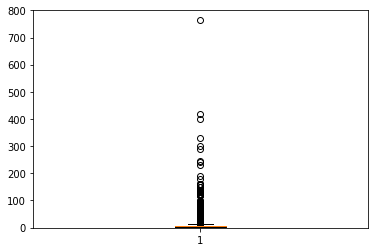

In [ ]:
#построим диаграмму размаха для колонки 'last_price'
plt.ylim(-1, 800)

plt.boxplot(data['last_price'] / 1000000);

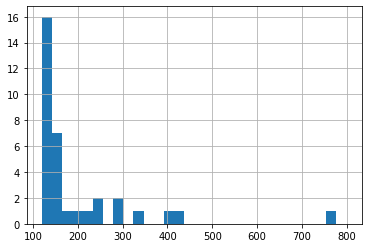

In [ ]:
#создадим гистограмму по колонке 'last_price'
(data['last_price'] / 1000000).hist(bins=30, range=(120, 800));

На диаграмме размаха и гистограмме заметны выбросы от 150 до 800 млн за квартиру. Необходимо сделать новый dataframe с выборкой и проверить сколько процентов от общего dataframe составляют такие позиции, если больше 10%, то оставляем, если меньше, то можно удалить.

In [ ]:
#выводим характерные значения по колонке 'total_area'
data['total_area'].describe()

count   23560.0
mean       60.3
std        35.7
min        12.0
25%        40.0
50%        52.0
75%        69.7
max       900.0
Name: total_area, dtype: float64

По колонке общей площади квартиры имеются аномально высокие значения, достгающие максимального значения 900 кв.м. Необходимо проверить долю аномальных значений. Сперва сформируем диаграмму размаха по данной колонке.

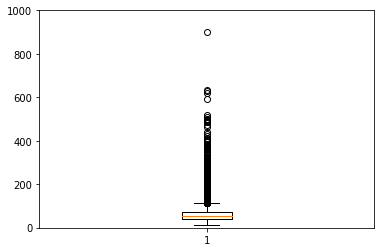

In [ ]:
#построим диаграмму размаха для колонки 'total_area'
plt.ylim(-1, 1000)

plt.boxplot(data['total_area']);

По диаграмме разамаха по колонке 'total_area' видны выбросы от 580 до 900 метров включительно.

<AxesSubplot:>

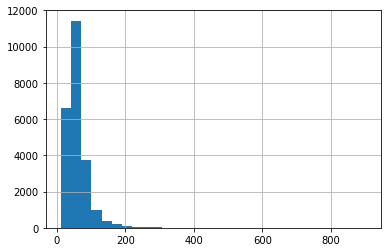

In [ ]:
#построим гистограмму по колонке 'total_area'
data['total_area'].hist(bins=30)

По гистограмме заметен сход графика к 0 в диапазоне от 200 до 300 кв.м. Данные позиции являются аномальными, в последующем анализе их можно отбросить.

In [ ]:
#выводим характерные значения по колонке 'rooms'
data['rooms'].describe()

count   23560.0
mean        2.1
std         1.1
min         0.0
25%         1.0
50%         2.0
75%         3.0
max        19.0
Name: rooms, dtype: float64

В колонке 'rooms' максимальное количество комнат достигает значения 19, необходимо построить диаграмму размаха для понимания сколько аномальных значений присутствует в данной колонке.

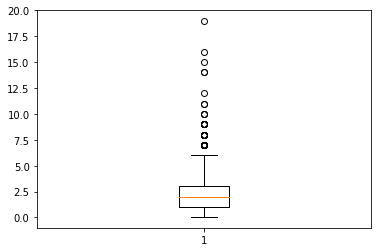

In [ ]:
#построим диаграмму размаха для колонки 'rooms'
plt.ylim(-1, 20)

plt.boxplot(data['rooms']);

Аномальные значения наблюдаются от 7.5 до 19 комнат в квартире.

<AxesSubplot:>

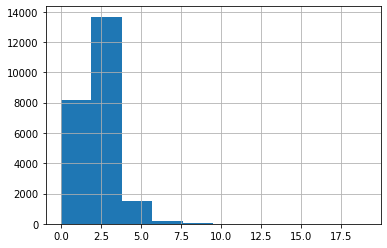

In [ ]:
#построим гистограмму по колонке 'total_area'
data['rooms'].hist(bins=10)

По гистограмме заметен сход графика к 0 в диапазоне от 6 до 7 комнат. Данные позиции являются аномальными, в последующем анализе их можно отбросить.

In [ ]:
#создадим новый dataframe убрав строки с аномальными значениями по стоимости квартир, общей площади и количеству комнат
new_data = data[(data['last_price'] < 150000000) & (data['total_area'] < 200) & (data['rooms'] < 6)]

In [ ]:
#проверим долю исключенных аномальных данных
print('Доля исключенных аномальных значений:', new_data.shape[0] / data.shape[0])

Доля исключенных аномальных значений: 0.9865449915110357


In [ ]:
#удалим из dataframe аномальные значения по колонкам 'last_price', 'total_area', 'rooms'
#df = df[(df.assists > 8) | (df.rebounds > 10)]
data = data[(data['last_price'] < 150000000) & (data['total_area'] < 200) & (data['rooms'] < 7.5)]

Доля аномальных значений составляет 0,1%. Данные значения можно отбросить для последующего анализа.


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b>
<br>Давай ещё изучим аномалии в других столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавил проверку аномальных значений по колонкам 'last_price', 'total_area', 'rooms'. Данные можно отбросить из dataframe и выполнять анализ без них, так как они составляют 0,1% от общего dataframe.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b>
<br>Аномалии остались. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить.
</div>


<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br> Пересмотрел проверку аномальных значений по колонкам 'last_price', 'total_area', 'rooms'. Добавил дополнительные гистограммы по твоему примеру для наглядного отображения аномальных значений. Данные можно отбросить из dataframe и выполнять анализ без них, так как они составляют 0,2% от общего dataframe.
    Пример удалил.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Отлично! Теперь всё верно)
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
#добавляем колонку 'price_square_meter' со значениями стоимости квадратного метра
data['price_square_meter'] = data['last_price'] / data['total_area']

In [ ]:
#добавляем колонку 'week_day_exposition' со значением дня неделеи публикации объявления
data['week_day_exposition'] = data['first_day_exposition'].dt.dayofweek

In [ ]:
#добавляем колнку 'month_exposition' со значениями месяцев публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [ ]:
#добавляем колнку 'year_exposition' со значениями года публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [ ]:
#добавляем колонку 'floor_type' c категорией этажа квартиры 'первый', 'последний', 'другое'
data.loc[:, 'floor_type'] = 'другой'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'

In [ ]:
#добавляем колонку 'city_centers_nearest_km' со значениями расстояния до центра в километрах
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype(int)

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.6,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.6,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.6,14.0,90.8,9,False,False,False,27.8,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.0,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8
5,10,2890000.0,30.4,2018-09-10,1,2.6,12.0,14.4,5,False,False,False,9.1,0.0,поселок городского типа Янино-1,NaN,13098.5,0.0,NaN,0.0,NaN,55.0,95065.8,0,9,2018,другой,13
6,6,3700000.0,37.3,2017-11-02,1,2.6,26.0,10.6,6,False,False,False,14.4,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,3,11,2017,другой,19
7,5,7915000.0,71.6,2019-04-18,2,2.6,24.0,40.9,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,3,4,2019,другой,11
8,20,2900000.0,33.2,2018-05-23,1,2.6,27.0,15.4,26,False,False,False,8.8,0.0,поселок Мурино,NaN,13098.5,0.0,NaN,0.0,NaN,189.0,87454.8,2,5,2018,другой,13
9,18,5400000.0,61.0,2017-02-26,3,2.5,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,6,2,2017,другой,15


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Изучение основных колонок dataframe

In [ ]:
#выведим характерные значения для колонки 'total_area'
data['total_area'].describe()

count   23324.0
mean       58.1
std        26.4
min        12.0
25%        40.0
50%        51.7
75%        68.7
max       199.2
Name: total_area, dtype: float64

По среднему значению и медианному (2ой квартиль) можно наблюдать, что среднее значение больше медианного, что может говорить о наличии несколько выскоих значений, которые выбиваются из общего списка площадей квартир. Выбивающиеся данные можно не учитывать при анализе, так как являются выбросами.

Для посроение гистограммы можно взять диапазон от 0 до 100 м2, так как основной пул размещенных объявлений находится в данном диапазоне.

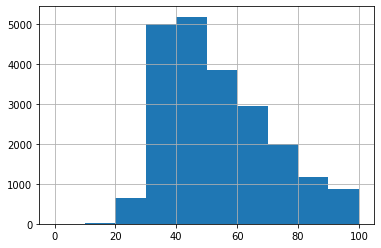

In [ ]:
# создадим гистограмму по колонке 'total_area'
data['total_area'].hist(bins=10, range=(0,100));

По созданной гистрограмме можно увидеть, что наибольшее количество объявления квартир с площадью от 30 до 50м2. Построенная гистрограмма предствляет собой распределение Пуассона, наблюдается снижение количества объявлений с площадью больше 50м2 и далее.

In [ ]:
#выведим характерные значения для колонки 'living_area'
data['living_area'].describe()

count   23324.0
mean       33.3
std        17.2
min         2.0
25%        19.0
50%        30.0
75%        42.0
max       164.7
Name: living_area, dtype: float64

In [ ]:
#выведим характерные значения для колонки 'kitchen_area'
data['kitchen_area'].describe()

count   23324.0
mean       10.3
std         5.3
min         1.3
25%         7.0
50%         9.0
75%        11.8
max        93.2
Name: kitchen_area, dtype: float64

Аналогичная ситуация как и с общей площадью, так и с общей жилой площадью и площадью кухни. Можно заметить, что по среднему значению и медианному (2ой квартиль) можно наблюдать, что среднее значение больше медианного, что может говорить о наличии несколько выскоих значений, которые выбиваются из общего списка жилых площадей квартир и площадей кухни. Выбивающиеся данные можно не учитывать при анализе, так как являются выбросами.

Для зависимости жилой площади и площади кухни от общей площади построим график.

Для посроение гистограммы по жилой площади можно взять диапазон от 0 до 50 м2, так как основной пул размещенных объявлений находится в данном диапазоне, а по площади кухни можно взять диапазон от 0 до 20 м2.

<AxesSubplot:xlabel='total_area'>

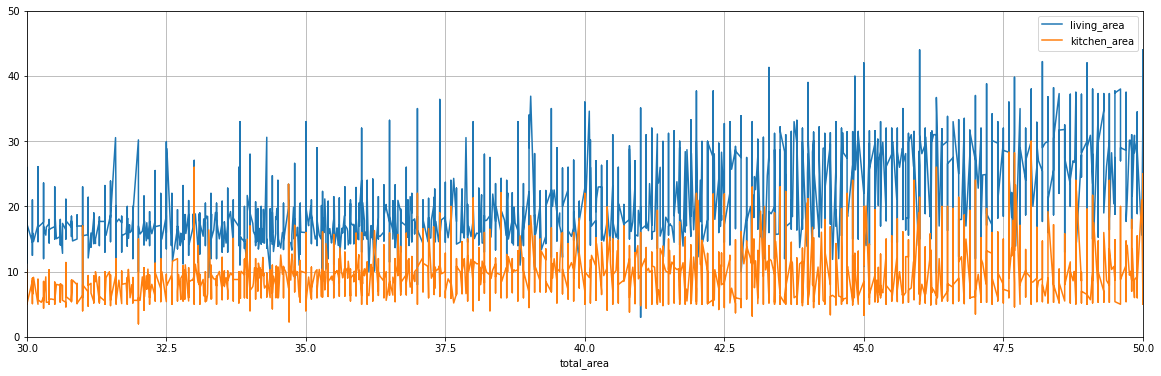

In [ ]:
# построим график для отслеживания зависимисоти
(
    data
        .sort_values(by=['total_area'], ascending=True)
        .plot(x='total_area', y=['living_area', 'kitchen_area'], xlim=(30, 50), ylim=(0, 50), grid=True, figsize=(20, 6))
)

По сводному графику можно наблюдать, что увеличение жилой площади и площади кухни прямо зависит от увеличения общей площади квартиры. Только в редких случаях наблюдается нетипично большие значения площадей кухон и общих жилых, данные значения могут быть значениями, которые в первононачальном dataframe были пустыми и заполнялись через формулы со средними значениями по колонкам.

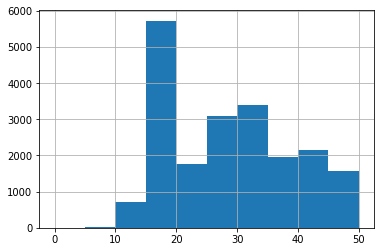

In [ ]:
# создадим гистограмму по колонке 'living_area'
data['living_area'].hist(bins=10, range=(0,50));

По созданной гистрограмме можно увидеть, что наибольшее количество объявления квартир с  жилой площадью от 15 до 20м2. На гистограмме наблюдается в указанном диапазоне выброс по количеству, из чего можно сделать вывод, что квартир с данной жилой площадью по количеству на сервисе больше всего.

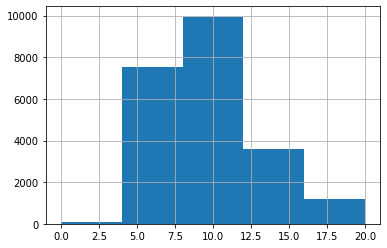

In [ ]:
# создадим гистограмму по колонке 'kitchen_area'
data['kitchen_area'].hist(bins=5, range=(0,20));

По созданной гистрограмме можно увидеть, что наибольшее количество объявления квартир с площадью кухни от 4 до 11м2. На гистограмме наблюдается в указанном диапазоне выброс по количеству, из чего можно сделать вывод, что квартир с данной площадью кухни по количеству на сервисе больше всего.

In [ ]:
#выведим характерные значения для колонки 'last_price'
data['last_price'].describe()

count       23324.0
mean      5991083.8
std       5559942.6
min         12190.0
25%       3400000.0
50%       4600000.0
75%       6698250.0
max     135000000.0
Name: last_price, dtype: float64

По характерным значениям колонки можно сделать следующий вывод, что в объявлениях присутствуют объявления как и о продаже квартир, так и их сдаче, об этом говорит минимальное значения колонке, которое равно 12190. В рамках проекта данные объявления являются некорректными, по этому при последующем анализе влиянении факторов на стоимость квартиры эти данные можно не учитывать.

Необходимо выполнить диаграмму размаха для подтверждения вывода.

<AxesSubplot:>

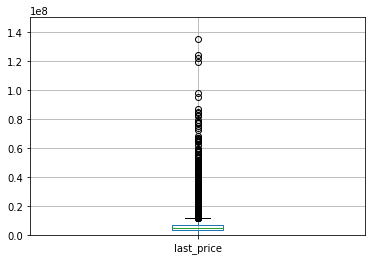

In [ ]:
#построим диаграмму размаха для колонки 'last_price'
plt.ylim(-1, 150000000)
data.boxplot(column=['last_price'])
#plt.boxplot(data['last_price']);

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b>
<br>График пустой
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br> Исправлено
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

По диаграмме видно выбросы от 10000000 до 200000000

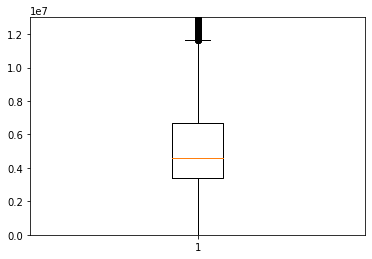

In [ ]:
#построим диаграмму размаха для колонки 'last_price'
plt.ylim(-1, 13000000)

plt.boxplot(data['last_price']);

По диаграмме видно, что основная часть объявлений лежит до 6,5 миллионов. 1й квартиль находится на границе 3,5 миллионов.
Подозрительно малых значений не наблюдается, факторы влияющие на стоимость необходимо анализировать в диапазоне от 3,5 до 6,5 миллионов.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b>
<br>График пустой
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br> Исправлено
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

<AxesSubplot:>

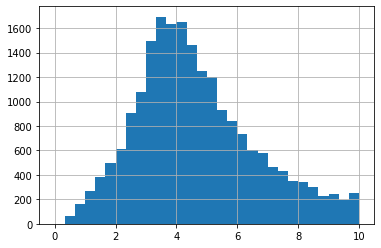

In [ ]:
# создадим гистограмму по колонке 'last_price'
(data['last_price'] / 1000000).hist(bins=30, range=(0,10))

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b>
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b>
<br>График пустой
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br> Исправлено. Значения разделены на 1 млн.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

По гистограмме наблюдается, что основная часть объявлений по стоимости находится в диапазоне от 3,5 до 4,1 млн.

In [ ]:
#выведим уникальные значения по колонке 'rooms'
data['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 0, 7])

In [ ]:
#создадим функцию для создания категорий квартир
def total_room (rooms):
    try:
        if rooms == 1:
            return 'однокомнатная'
        elif rooms == 2:
            return 'двухкомнатная'
        elif rooms == 3:
            return 'трехкомнатая'
        elif rooms == 4:
            return 'четырехкомнатая'
        elif rooms > 4:
            return 'другое'
    except:
        pass

#добавим колонку 'type_flat' в dataframe и выведим сводную таблицу по данной колонке с количеством
data['type_flat'] = data['rooms'].apply(total_room)
pivot_flat = data.pivot_table(index='type_flat', values='rooms', aggfunc=['count'])
pivot_flat.reset_index()
pivot_flat

,count
,rooms
type_flat,
двухкомнатная,7893
другое,344
однокомнатная,8001
трехкомнатая,5763
четырехкомнатая,1130


Наибольшее количество объявлений на платформе представлено для однокомнатных квартир, на втором месте двухкомнатные, далее трехкомнатные и четырехкомнатные. Квартиры больше 4х комнат от общего числа объявлений составляет примерно 2,16 %. Объявления категории  другое в колонке 'type_flat' можно отнести к частным домам.

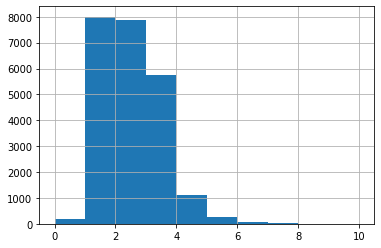

In [ ]:
# создадим гистограмму по колонке 'rooms'
data['rooms'].hist(bins=10, range=(0,10));

Основной пул объявлений по продаже квартире с количеством комнат равным одной и двум.

In [ ]:
#выведим характерные значения для колонки 'ceiling_height'
data['ceiling_height'].describe()

count   23324.0
mean        2.7
std         0.2
min         2.0
25%         2.6
50%         2.6
75%         2.7
max        10.0
Name: ceiling_height, dtype: float64

Отклонение значений высоты потолка от среднего значения стремится к нулю, из чего можно сделать вывод, что значения однородны с незначительными выбросами. Выбросы могут указывать на объявление продаж дома.

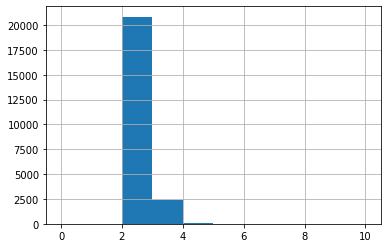

In [ ]:
# создадим гистограмму по колонке 'ceiling_height'
data['ceiling_height'].hist(bins=10, range=(0,10));

По гистограмме также можно наблюдать, что пик продаваемых квартир приходится на высоту потолка 2 до 3 метров.

In [ ]:
#выведим характерные значения для колонки 'floor'
data['floor'].describe()

count   23324.0
mean        5.9
std         4.9
min         1.0
25%         2.0
50%         4.0
75%         8.0
max        33.0
Name: floor, dtype: float64

In [ ]:
#создадим сводную таблицу по количеству на каких этажах находятся квартиры из объявлений
pivot_floor = data.pivot_table(index='floor', values='airports_nearest', aggfunc=['count'])

pivot_floor.columns = ['count']
pivot_floor.sort_values(by='count', ascending=False)

,count
floor,
2,2363
3,2268
4,2070
1,1974
5,1881
6,1063
7,986
8,914
9,868


По сводной таблице можно сделать вывод, что большая часть квартир продается в многоэтажных или малоэтажных зданиях.

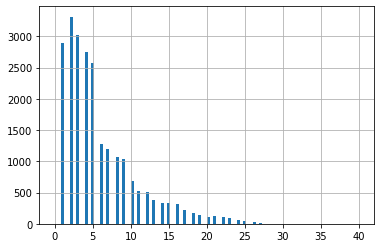

In [ ]:
# создадим гистограмму по колонке 'floor'
data['floor'].hist(bins=100, range=(0,40));

В основном квартиры продаются на 2 и 3 этаже. Гисторграмма представляет распределение Пуассона.

In [ ]:
#создадим сводную таблицу по категории Тип этажа
pivot_floor_type = data.pivot_table(index='floor_type', values='airports_nearest', aggfunc=['count'])
pivot_floor_type.columns = ['count']
pivot_floor_type

,count
floor_type,
другой,13584
первый,1968
последний,2256


По таблице мы наблюдаем, что основная часть квартир по объявлениям находится в группе "другой", это говорит нам о том, что большая часть квартир продается в многоэтажных и малоэтажных зданиях, большая часть из них находится не на первых этажах.

In [ ]:
#выведим характерные значения для колонки 'floors_total'
data['floors_total'].describe()

count   23324.0
mean       10.7
std         6.6
min         1.0
25%         5.0
50%         9.0
75%        16.0
max        60.0
Name: floors_total, dtype: float64

In [ ]:
#создадим сводную таблицу по кодичеству этажей в зданиях
pivot_floors_total = data.pivot_table(index='floors_total', values='airports_nearest', aggfunc=['count'])
pivot_floors_total.columns = ['count']
pivot_floors_total.sort_values(by='count', ascending=False)

,count
floors_total,
5.0,3644
9.0,3182
16.0,1218
12.0,1178
10.0,928
25.0,923
4.0,868
6.0,766
17.0,671


По таблице видно, что основная часть квартир находится в малоэтажных застройках. Данная информация может говорить о том, что в основном квартиры продаются в спальных районах. Для подтверждения данной информации в сводную таблицу необходимо добавить колонку 'city_centers_nearest' со средними значениями.

In [ ]:
#создадим сводную таблицу по удаленности от центра
pivot_city_centers_nearest = data.pivot_table(index='floors_total', values='city_centers_nearest', aggfunc=['mean'])
pivot_city_centers_nearest.columns = ['mean_city_center_nearest']

#соединим две сводные таблицы по количеству этажей и удаленности от центра
pivot_floors_total.merge(pivot_city_centers_nearest, on='floors_total').sort_values(by='count', ascending=False)

,count,mean_city_center_nearest
floors_total,,
5.0,3644,14037.2
9.0,3182,15499.0
16.0,1218,13486.8
12.0,1178,14032.1
10.0,928,13876.3
25.0,923,14386.2
4.0,868,14160.7
6.0,766,9202.0
17.0,671,14093.0


Основная часть квартир продается в радиусе 13-16 км от центра. По данной информации можно сделать вывод, что данные застройки могут относится к старому фонду и является густонаселенными районами (спальными).

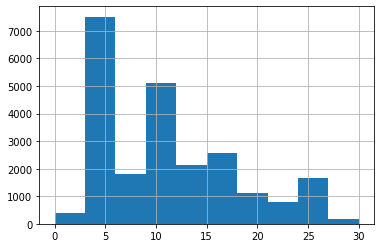

In [ ]:
# создадим гистограмму по колонке 'floors_total'
data['floors_total'].hist(bins=10, range=(0,30));

Пик продаж квартир приходится на малоэтажную застройку от 4х до 6 этажей

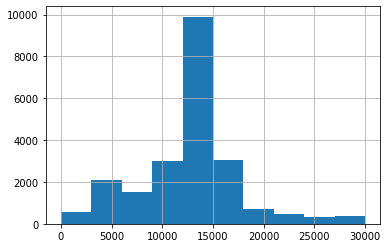

In [ ]:
# создадим гистограмму по колонке 'city_centers_nearest'
data['city_centers_nearest'].hist(bins=10, range=(0,30000));

Основная часть объявлний находится в раидусе от 12,5 до 15 км от центра. По данной гистограмме можно сказать, что большая часть квартир находится в черте города.

In [ ]:
#выведим характерные значения для колонки 'parks_nearest'
data['parks_nearest'].describe()

count   7872.0
mean     491.8
std      342.4
min        1.0
25%      288.0
50%      456.0
75%      613.0
max     3190.0
Name: parks_nearest, dtype: float64

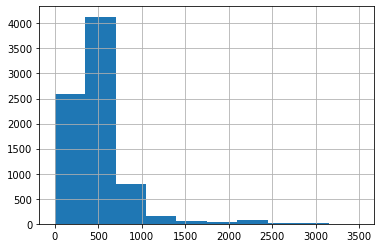

In [ ]:
# создадим гистограмму по колонке 'parks_nearest'
data['parks_nearest'].hist(bins=10, range=(0,3500));

Большая часть объявлений находится в непосредственной близости от парков, в основном удаленность от парка находится в диапазоне от 400 до 650 метров.

In [ ]:
#выведим характерные значения для колонки 'airports_nearest'
data['airports_nearest'].describe()

count   17808.0
mean    28827.7
std     12681.6
min         0.0
25%     18496.0
50%     26831.5
75%     37364.0
max     84869.0
Name: airports_nearest, dtype: float64

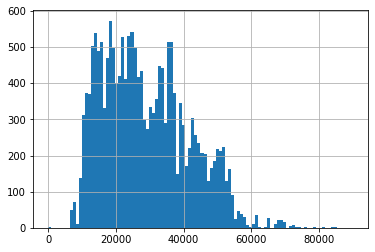

In [ ]:
# создадим гистограмму по колонке 'airports_nearest'
data['airports_nearest'].hist(bins=100, range=(0,90000));

По гистограмме и по характерным значениям колонки 'airports_nearest' наблюдается выброс и наибольшее количество квартир находится в радиусе от 22 до 34 км, что говорит о том, что квартиры находятся в черте города. Квартиры, которые расположены вблизи аэропорта до 22 км и меньше означает, что данные квартиры находятся либо вне черты города, либо в непосредственной близости вокруг аэропорта.

In [ ]:
#создадим сводную таблицу по дням и месяцем опубликации объявлений
pivot_exposition = data.pivot_table(index='month_exposition', columns='week_day_exposition', values='city_centers_nearest', aggfunc=['count'])
pivot_exposition.columns = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
pivot_exposition.index.names = ['month']
pivot_exposition

,Пн,Вт,Ср,Чт,Пт,Сб,Вс
month,,,,,,,
1,282,229,248,205,249,135,118
2,349,454,367,759,346,171,169
3,394,487,390,408,426,244,201
4,446,400,325,407,419,174,160
5,170,207,267,247,218,71,67
6,201,283,273,363,339,154,116
7,308,340,263,242,214,164,133
8,260,335,353,283,263,129,104
9,257,351,390,311,308,177,155


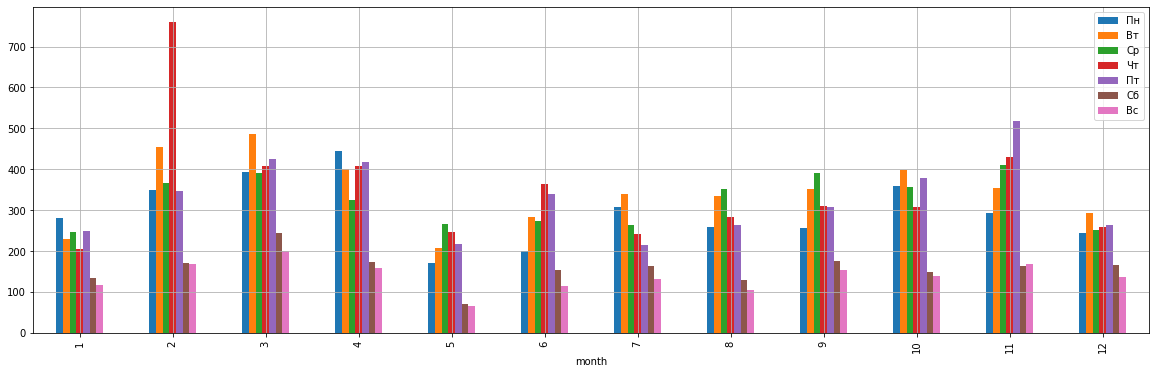

In [ ]:
#создадим график по каждому месяцу и количеству объявлений по дням недели
pivot_exposition.plot(kind='bar', grid=True, figsize=(20, 6));

In [ ]:
#добавим в сводную таблицу колонку с суммарным количеством объявлений по каждому месяцу и по каждому дню
pivot_exposition['total_for_month'] = pivot_exposition.sum(axis=1)
pivot_exposition.loc['total_for_day'] = pivot_exposition.sum()
pivot_exposition.sort_values(by='total_for_month', ascending=False)

,Пн,Вт,Ср,Чт,Пт,Сб,Вс,total_for_month
month,,,,,,,,
total_for_day,3565,4133,3896,4224,3941,1898,1667,23324
2,349,454,367,759,346,171,169,2615
3,394,487,390,408,426,244,201,2550
11,293,355,410,431,517,165,168,2339
4,446,400,325,407,419,174,160,2331
10,360,398,357,308,378,148,140,2089
9,257,351,390,311,308,177,155,1949
6,201,283,273,363,339,154,116,1729
8,260,335,353,283,263,129,104,1727


По диаграмме и сводной таблице с суммарным количеством по месяцам и дням можно сделать следующие выводы:
- наименьшее количество приходится на декабрь, январь и май - это обусловлено тем, что январь и май имеют наибольшее количество праздников в году, в связи с чем размещать объявления нецелесообразно, так как большая часть людей отдыхает или находится в разъездах.
- наибольшее количество приходится на на февраль, март, ноябрь, апрель, октябрь - это обусловлено тем, что данные месяца являются максимально рабочими, большая часть людей находится в активной фазе выполнения всех своих потребностей.
- среднее количество объявлений приходится на летние месяца, так данные месяца являются отпускными
- наибольшее количество объявлений подается во вторник и четверг, можно предположить, что данные дня являются оптимальными, так как понедельник - день, когда человек полностью погружен в задачи по работе и подготовке к рабочей неделе в целом, чертверг, так как данный день в неделе менее загружен по работе, и у общего количества людей появляется больше свободного времени.
- наименьшее количество публикации объявлений приходится на субботу и воскресение, так как данные дни являются выходными и люди в общем и целом занимаются бытовыми вопросами.
- самое большое количество объявлений подано в феврале по четвергам.
- самое маленькое количество объявлений подано в мае в воскресение.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики!
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b>
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html
</div>

#### Как быстро продавались квартиры (столбец 'days_exposition')?

In [ ]:
#выведим характерные значения для колонки 'days_exposition'
data['days_exposition'].describe()

count   20208.0
mean      179.5
std       218.3
min         1.0
25%        45.0
50%        95.0
75%       229.0
max      1580.0
Name: days_exposition, dtype: float64

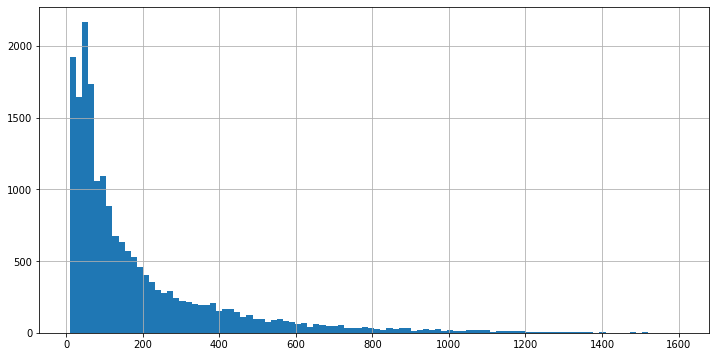

In [ ]:
#построим гистограмму по колонке 'days_exposition'
data['days_exposition'].hist(bins=100, range=(10, 1600), figsize=(12,6));

По гистограмме наблюдается высокий пик от 20 до 50 дней, для более понятной квартиры необходимо реализовать диаграмму размаха.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b>
<br>Это из-за заполнения пропусков
</div>

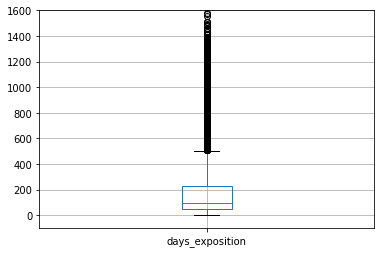

In [ ]:
#построим диаграмму размаха для колонки 'days_exposition'
plt.ylim(-100.0, 1600.0)
data.boxplot(column=['days_exposition']);

По первоначальной диаграмме размаха наблюдается большое количество выбросом после 500 дней.
Первый и третий квартили находятся в диапазоне от 50 до 250 дней, для более четкой картины необходимо построить вторую версию диаграммы размаха с новым диапазоном для изучений квартилей и медианного значения.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Подскажи, пожалуйста, как теперь построить диаграммы размаха по данной колонке? Не очень понимаю, почему теперь никаких данных не отображается((
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b>
<br>data.boxplot(column=['days_exposition'])
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

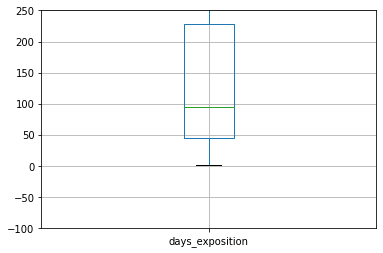

In [ ]:
#построим диаграмму размаха для колонки 'days_exposition'
plt.ylim(-100, 250)

data.boxplot(column=['days_exposition']);

По диаграмме размаха наблюдаем, что большая часть объявлений закрывается до 225 дней. Медианное значение находится в диапазоне от 90 дней. Пик, который наблюдается на гистограмме указывает на самые быстрые по закрытию объявления. Выбросы могут быть обусловлены несколькими факторами: удаленность от центра, тип локации (поселок, поселок городского типа, город и т.д.), цена.

In [ ]:
#посчитаем среднее значение по количеству дней до продажи
mean_days_exposition = data['days_exposition'].mean()
#посчитаем медианное значение по количеству дней до продажи
median_days_exposition = data['days_exposition'].median()

print('Среднее количество дней:', mean_days_exposition)
print('Медианное количество дней:', median_days_exposition)

Среднее количество дней: 179.5167755344418
Медианное количество дней: 95.0


In [ ]:
#выведим позиции dataframe, которые удовлетворяют условию - количество дней до снятия больше 40 дней и меньше 90 дней
(
data
    .sort_values(by='days_exposition', ascending=True)
    .query('40 <= days_exposition < 90').head(20)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km,type_flat
9343,16,4750000.0,63.0,2018-07-02,3,2.5,9.0,43.0,6,False,False,False,6.3,0.0,Санкт-Петербург,12631.0,11158.0,1.0,624.0,1.0,805.0,40.0,75396.8,0,7,2018,другой,11,трехкомнатая
18488,12,5900000.0,60.0,2018-08-22,2,2.7,3.0,36.0,1,False,False,False,8.0,0.0,Санкт-Петербург,36917.0,9108.0,1.0,2427.0,3.0,274.0,40.0,98333.3,2,8,2018,первый,9,двухкомнатная
9526,4,2650000.0,35.0,2018-02-17,1,2.6,16.0,20.5,12,False,False,False,7.2,2.0,Всеволожск,NaN,13098.5,0.0,NaN,0.0,NaN,40.0,75714.3,5,2,2018,другой,13,однокомнатная
23125,12,6750000.0,55.0,2017-08-22,2,2.6,5.0,34.0,3,False,False,False,9.0,0.0,Санкт-Петербург,16171.0,7376.0,1.0,649.0,0.0,NaN,40.0,122727.3,1,8,2017,другой,7,двухкомнатная
716,5,1500000.0,17.0,2017-06-07,0,2.7,9.0,12.0,1,False,True,False,3.0,0.0,поселок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,88235.3,2,6,2017,первый,29,None
9464,12,4600000.0,83.0,2018-10-15,4,2.6,9.0,54.0,9,False,False,False,10.0,0.0,Выборг,NaN,13098.5,0.0,NaN,0.0,NaN,40.0,55421.7,0,10,2018,последний,13,четырехкомнатая
11862,11,3900000.0,44.0,2019-03-12,2,2.5,5.0,28.0,3,False,False,False,6.0,0.0,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,40.0,88636.4,1,3,2019,другой,15,двухкомнатная
16207,14,10500000.0,76.6,2018-02-01,2,2.6,16.0,37.0,12,False,False,False,16.9,0.0,Санкт-Петербург,30366.0,7737.0,0.0,NaN,1.0,372.0,40.0,137075.7,3,2,2018,другой,7,двухкомнатная
129,0,3200000.0,32.0,2018-02-01,1,2.5,9.0,18.0,3,False,False,False,8.0,0.0,Санкт-Петербург,49587.0,16425.0,1.0,215.0,0.0,NaN,40.0,100000.0,3,2,2018,другой,16,однокомнатная
18486,12,2090000.0,35.0,2017-05-04,2,2.5,9.0,21.0,4,False,False,False,6.0,1.0,поселок станции Приветнинское,NaN,13098.5,0.0,NaN,0.0,NaN,40.0,59714.3,3,5,2017,другой,13,двухкомнатная


In [ ]:
#выведим позиции dataframe, которые удовлетворяют условию - количество дней до снятия равно 90 дням
(
data
    .sort_values(by='days_exposition', ascending=True)
    .query('days_exposition == 90').head(20)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km,type_flat


In [ ]:
#выведим позиции dataframe, которые удовлетворяют условию - количество дней до снятия больше 90 дней и меньше или равно 225 дней
(
data
    .sort_values(by='days_exposition', ascending=True)
    .query('90 < days_exposition <= 225').head(20)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km,type_flat
14741,1,12000000.0,31.0,2018-01-05,1,2.6,4.0,17.7,1,False,False,False,5.4,0.0,Санкт-Петербург,23647.0,1500.0,3.0,304.0,3.0,33.0,90.0,387096.8,4,1,2018,первый,1,однокомнатная
12277,16,3859000.0,65.5,2017-04-04,3,2.5,9.0,48.5,8,False,False,False,6.3,0.0,Санкт-Петербург,19010.0,18013.0,1.0,362.0,1.0,319.0,90.0,58916.0,1,4,2017,другой,18,трехкомнатая
15691,4,1800000.0,53.5,2017-11-24,2,2.5,5.0,29.7,1,False,False,False,8.1,0.0,Волосово,NaN,13098.5,0.0,NaN,0.0,NaN,90.0,33644.9,4,11,2017,первый,13,двухкомнатная
11487,19,12400000.0,98.0,2017-04-28,2,2.6,22.0,45.0,6,False,False,False,28.0,1.0,Санкт-Петербург,38850.0,12548.0,1.0,724.0,0.0,NaN,90.0,126530.6,4,4,2017,другой,12,двухкомнатная
23631,17,14799000.0,104.0,2018-11-18,3,3.1,4.0,66.0,2,False,False,False,14.0,1.0,Санкт-Петербург,39047.0,13944.0,0.0,NaN,1.0,553.0,90.0,142298.1,6,11,2018,другой,13,трехкомнатая
22930,13,14145000.0,85.0,2018-03-04,3,2.6,12.0,48.5,7,False,False,False,14.9,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0,166411.8,6,3,2018,другой,10,трехкомнатая
2315,6,3200000.0,40.0,2017-08-26,1,2.7,21.0,19.0,9,False,False,False,10.0,0.0,деревня Кудрово,NaN,13098.5,0.0,NaN,0.0,NaN,90.0,80000.0,5,8,2017,другой,13,однокомнатная
8591,19,13500000.0,100.0,2017-12-03,3,2.5,15.0,57.1,3,False,False,False,17.5,0.0,Санкт-Петербург,37347.0,9820.0,1.0,364.0,0.0,NaN,90.0,135000.0,6,12,2017,другой,9,трехкомнатая
6564,6,10590000.0,85.0,2017-02-16,2,2.6,19.0,39.8,17,False,False,False,15.6,0.0,Санкт-Петербург,18934.0,4529.0,0.0,NaN,0.0,NaN,90.0,124588.2,3,2,2017,другой,4,двухкомнатная
9347,1,3250000.0,34.0,2017-07-19,1,2.5,9.0,17.0,2,False,False,False,7.0,0.0,Санкт-Петербург,49587.0,16425.0,1.0,215.0,0.0,NaN,90.0,95588.2,2,7,2017,другой,16,однокомнатная


In [ ]:
#выведим позиции dataframe, которые удовлетворяют условию - количество дней до снятия больше 500 дней
(
data
    .sort_values(by='days_exposition', ascending=True)
    .query('250 < days_exposition').head(20)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,week_day_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km,type_flat
18943,18,4500000.0,42.0,2018-05-16,1,2.6,6.0,19.0,6,False,False,False,11.0,0.0,Пушкин,18079.0,30232.0,1.0,357.0,1.0,177.0,251.0,107142.9,2,5,2018,последний,30,однокомнатная
12560,11,3800000.0,38.0,2016-01-29,1,2.7,14.0,21.0,11,False,False,False,7.5,0.0,Санкт-Петербург,45566.0,19137.0,0.0,NaN,0.0,NaN,251.0,100000.0,4,1,2016,другой,19,однокомнатная
12134,5,3940000.0,40.4,2017-05-17,1,2.9,25.0,23.1,11,False,False,False,7.1,2.0,Санкт-Петербург,37539.0,10197.0,1.0,1094.0,0.0,NaN,251.0,97524.8,2,5,2017,другой,10,однокомнатная
4974,11,2590000.0,43.0,2017-11-16,1,2.8,9.0,18.3,8,False,False,False,10.6,2.0,поселок Романовка,NaN,13098.5,0.0,NaN,0.0,NaN,251.0,60232.6,3,11,2017,другой,13,однокомнатная
16548,5,3500000.0,45.0,2017-07-28,2,2.6,9.0,30.0,8,False,False,False,6.5,0.0,Санкт-Петербург,16641.0,15643.0,0.0,NaN,2.0,478.0,251.0,77777.8,4,7,2017,другой,15,двухкомнатная
8743,19,3400000.0,36.0,2018-03-10,1,2.6,12.0,18.0,2,False,False,False,9.5,2.0,поселок городского типа Янино-1,NaN,13098.5,0.0,NaN,0.0,NaN,251.0,94444.4,5,3,2018,другой,13,однокомнатная
3447,3,6550000.0,80.0,2015-11-19,2,2.8,23.0,36.0,20,False,False,False,11.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,251.0,81875.0,3,11,2015,другой,14,двухкомнатная
19741,8,3670000.0,43.0,2018-03-03,2,2.5,5.0,25.0,1,False,False,False,5.2,0.0,Пушкин,14279.0,26433.0,0.0,NaN,0.0,NaN,251.0,85348.8,5,3,2018,первый,26,двухкомнатная
12106,2,4785000.0,39.6,2017-05-11,1,2.6,13.0,15.9,2,False,False,False,15.8,0.0,Санкт-Петербург,51443.0,13370.0,1.0,805.0,0.0,NaN,251.0,120894.4,3,5,2017,другой,13,однокомнатная
1893,18,7400000.0,82.5,2017-05-09,3,3.3,7.0,43.0,3,False,False,False,14.0,2.0,Санкт-Петербург,23548.0,3090.0,0.0,NaN,0.0,NaN,251.0,89697.0,1,5,2017,другой,3,трехкомнатая


Продажа квартиры в среднем занимает от 40 до 225 дней. Для более целостной квартиры лучше принимать за правду медианное значение равное 90 дням.

По таблицам построенным в соответстветсвии с условиями временных диапазонов можно сделать следюущие выводы:
- более быстро закрываются объявления, которые:
        а) Попадают в самый продаваемый радиус по удаленности от центра (от 13 до 15 км).
        б) В быстрые объявления попадают квартиры, у которых квадратура жилой площади большая, при этом цена за квадратный метр меньше, чем у остальных.
        в) Также объявления размещенные в благоприятные месяца и дни недели продавалисб юыстрее.
- более долго закрываются объявления, которые:
        а) Размещены в праздничные/отпускные месяца и в выходние дни, в эти месяца и дни объявления уходит вниз по актуальности.
        б) Высокая цена за квадратный метр.
        в) Наибольшее количество объявлений находятся далеко от центра.
        г) Квартиры с большой жилплощадью, от 220 и выше кв.м.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b>
<br>Здесь выводы нужно будет пересмотреть после правок в предыдущих разделах
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Какие факторы влияют на стоимость квартиры?

In [ ]:
#создадим отдельный dataframe с колонками 'last_price', 'total_area', 'living_area', 'kitchen_area'
last_price_frame = pd.DataFrame(data, columns=['last_price', 'total_area', 'living_area', 'kitchen_area'])
#выведим для всех столбцов кэффициенты корреляции
last_price_frame.corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.0,0.7,0.6,0.6
total_area,0.7,1.0,0.9,0.6
living_area,0.6,0.9,1.0,0.4
kitchen_area,0.6,0.6,0.4,1.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верное и компактное решение!
</div>

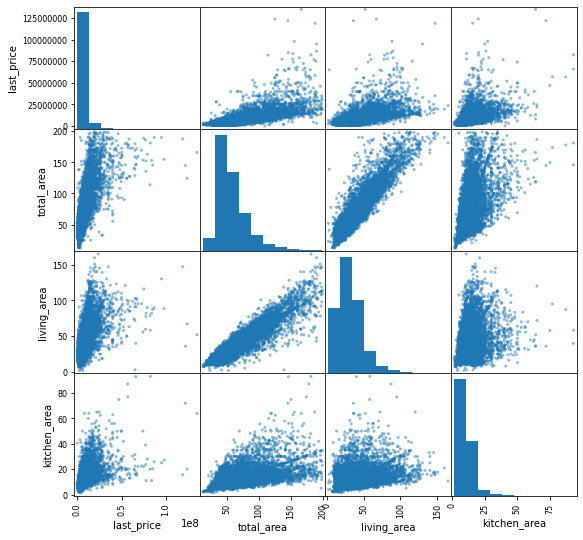

In [ ]:
#создадим матрицу диаграмм рассеивания
pd.plotting.scatter_matrix(last_price_frame, figsize=(9, 9));

По матрице коэффициентов корреляции и по матрице диаграмм рассеивания можно сделать вывод:
- наибольшее влияние на конечную сумму за квартиру влияет общая площадь и жилая площадь. Площидь кухни находится в среднем значении между 0 и 1, небольшое влияние оказывает, но без какой либо сильной прогрессии.
- также можно обратить внимание, что наибольшее сильно влияние оказывает общая площадь на жилую площадь, коэффициент практическе равен одному, из чего можно сделать вывод, что чем больше общая площадь, тем больше жилая площадь, по этому на рост цен можно рассматривать один из этих параметров, так как они сильно зависимы друг от друга.

In [ ]:
#создадим сводную таблицу по количеству комнат. В dataframe мы вводили колонку с категориями по количеству комнат 'type_flat'
pivot_type_flat = data.pivot_table(index='type_flat', values='last_price', aggfunc=['mean'])
pivot_type_flat.reset_index()
pivot_type_flat.columns = ['_'.join(col).strip() for col in pivot_type_flat.columns.values]
pivot_type_flat = pivot_type_flat.reset_index()
pivot_type_flat.sort_values(by='mean_last_price', ascending=False)

,type_flat,mean_last_price
1,другое,15555205.4
4,четырехкомнатая,11792533.9
3,трехкомнатая,7986763.7
0,двухкомнатная,5551783.4
2,однокомнатная,3828734.7


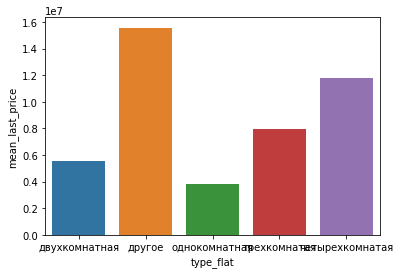

In [ ]:
import seaborn
# вывод столбчатой диаграммы по категории 'type_flat'
seaborn.barplot(x=pivot_type_flat['type_flat'], y=pivot_type_flat['mean_last_price']);

Количество комнат влияет на конечную стоимость квартиры. По ранее полученным данным наибольшее количество объявлений попадает в категорию, которые характерны для квартир с 1, 2, 3 и 4 комнатами. Если посмотреть на сводную таблицу и график, то можно увидеть, что рост квартиры от однокомнатной до следующей категории соответственно равен шагу в 1,5 раз. Квартиры, которые попадают в категорию "другое" (квартиры от 5 комнат и выше) больше категории "четырехкомнатная" больше уже почти в 2,5 раза.

In [ ]:
#создадим сводную таблицу по типу этажа. В dataframe мы вводили колонку с категориями по количеству комнат 'floor_type'
pivot_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc=['median'])
pivot_floor_type.reset_index()
pivot_floor_type.columns = ['_'.join(col).strip() for col in pivot_floor_type.columns.values]
pivot_floor_type = pivot_floor_type.reset_index()
pivot_floor_type.sort_values(by='median_last_price', ascending=False)

,floor_type,median_last_price
0,другой,4800000.0
2,последний,4250000.0
1,первый,3900000.0


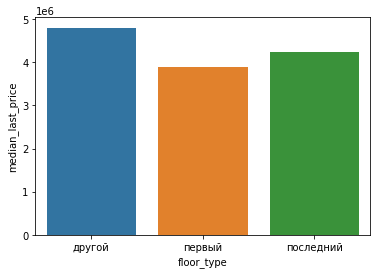

In [ ]:
# вывод столбчатой диаграммы по категории 'floor_type'
seaborn.barplot(x=pivot_floor_type['floor_type'], y=pivot_floor_type['median_last_price']);

Этаж квартиры сильного влиянения на стоимость квартиры не оказывает, но разница в стоимости присутствует незначительная. Квартиры первого этажа продаются дешевле, чем квартиры последующих этажей. Самыми дорогими квартирами являются квартиры, находящиеся между первым и последним этажами.

In [ ]:
#выведим уникальные значения по колонке 'year_exposition'
data['year_exposition'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [ ]:
#создадим сводную таблицу по колонке 'year_exposition' со средними значениями по колонке 'last_price'
pivot_year_exposition = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'count'])
pivot_year_exposition.reset_index()
pivot_year_exposition.columns = ['_'.join(col).strip() for col in pivot_year_exposition.columns.values]
pivot_year_exposition = pivot_year_exposition.reset_index()
pivot_year_exposition

,year_exposition,mean_last_price,count_last_price
0,2014,10909764.1,133
1,2015,7308732.2,1136
2,2016,6100150.1,2712
3,2017,5922986.3,8070
4,2018,5639420.0,8425
5,2019,6365203.5,2848


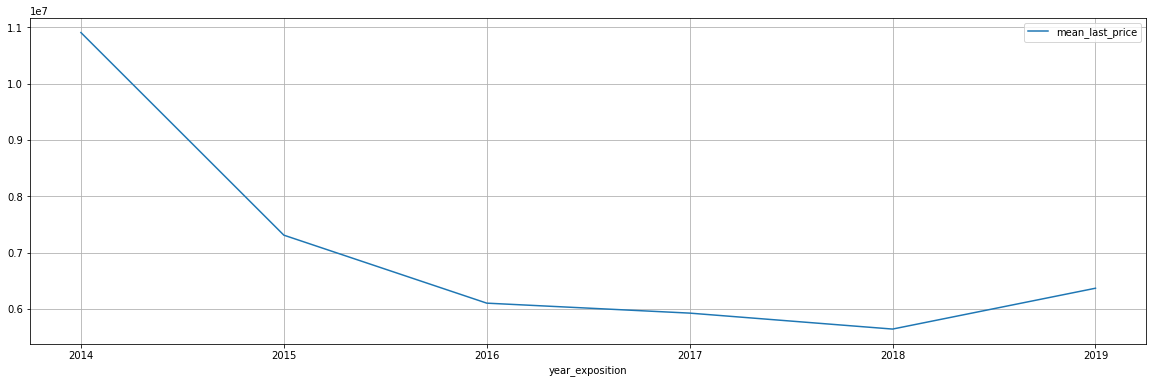

In [ ]:
# построим график для отслеживания зависимисоти
pivot_year_exposition.plot(x='year_exposition', y='mean_last_price', grid=True, figsize=(20, 6));

По сводной таблице и графику:
- Наибольшее количество объявлений было размещено в 2018 году, наименьшее количество размещено в 2014 году.
- Наблюдается резкий спад цены на квартиры с 2014 по 2016 год, в период с 2016 по 2018 спад цены стал более плавным, с 2018 по 2019 год замечается рост цен на квартиры.

Наблюдение резкого спада за 2014 год цены можно объяснить малым количеством объявлений.

In [ ]:
#создадим сводную таблицу по колонке 'year_exposition' со средними значениями по колонке 'last_price'
pivot_month_exposition = data.pivot_table(index=['year_exposition', 'month_exposition'], values='last_price', aggfunc=['mean'])
pivot_month_exposition.columns = ['_'.join(col).strip() for col in pivot_month_exposition.columns.values]
pivot_month_exposition

mean_last_price
year_exposition month_exposition                 
2014            11                     13537800.2
                12                     10444625.0
2015            1                      10157485.4
                2                       7665441.8
                3                       6823131.3
                4                       6457272.7
                5                       6402188.6
                6                       7394777.8
                7                       7327256.9
                8                       7185778.8
                9                       8781849.0
                10                      6906889.7
                11                      6479137.4
                12                      7413548.5
2016            1                       6081930.8
                2                       5802095.7
                3                       5961732.8
                4                       5697865.0
                5                       6230110.4
                6                       6547797.1
                7                       5670785.9
                8                       5109841.2
                9                       6320620.5
                10                      7151499.4
                11                      6393788.5
                12                      5982900.8
2017            1                       6033767.1
                2                       6248964.3
                3                       5993692.7
                4                       5951490.5
                5                       5665657.1
                6                       5488938.2
                7                       6531494.4
                8                       6054770.4
                9                       6040605.6
                10                      5751190.5
                11                      6001814.0
                12                      5611036.7
2018            1                       5421692.7
                2                       5565911.0
                3                       5372557.4
                4                       5619532.3
                5                       5745186.6
                6                       5363386.4
                7                       5627501.9
                8                       5974676.0
                9                       5771487.8
                10                      5589176.7
                11                      5912267.6
                12                      5883722.4
2019            1                       6154676.4
                2                       7131828.6
                3                       6096735.6
                4                       6187665.9
                5                       7407798.4

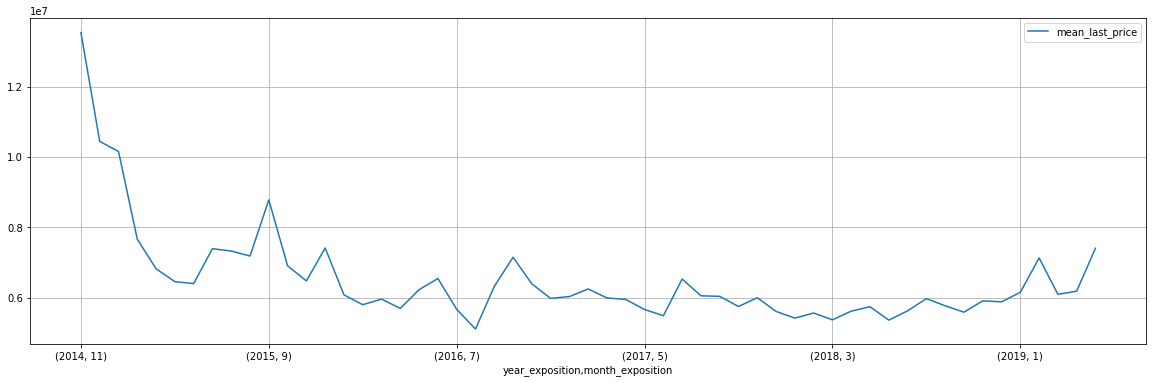

In [ ]:
# построим график для отслеживания зависимисоти
pivot_month_exposition.plot(y='mean_last_price', grid=True, figsize=(20, 6));

По графику и сводной таблице можно заметить закономерность, что цена уменьшается ближе к концу года, то есть в ноябре-декабре.
Также замечено регулярное падение цена с начала года (января) и до апреля, в большинстве случаев апреле-мае происходит возрастание цен на квартиры. Данное явление можно объяснить следующими выводами:
- перед концом года падение цен обусловлено срочной продажей и проведением сделок до нового года;
- в январе месяце в основном ставится максимальная цена.
- падение цены с января по апрель-май может быть обусловлено долгим простоем объявления.

In [ ]:
pivot_week_day_exposition = data.pivot_table(index='week_day_exposition', values='last_price', aggfunc=['mean', 'count'])
pivot_week_day_exposition.reset_index()
pivot_week_day_exposition.columns = ['_'.join(col).strip() for col in pivot_week_day_exposition.columns.values]
pivot_week_day_exposition = pivot_week_day_exposition.reset_index()
pivot_week_day_exposition.sort_values(by='mean_last_price', ascending=False)

,week_day_exposition,mean_last_price,count_last_price
3,3,6236099.9,4224
0,0,6051576.0,3565
1,1,6008543.1,4133
2,2,5969022.5,3896
5,5,5858853.5,1898
4,4,5846966.9,3941
6,6,5740409.3,1667


Наибольшие цены устанавливаютс пользователями устанавливаются в субботу. Минимальное значение цен наблюдается в воскресение.
Это можно объяснить тем, что в выходные пользователи готовы подождать в виду свободного времени и получить помаксимуму из сделки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

#### Средняя цена квадратного метро в 10 населенных пунктах

In [ ]:
#сформируем сводную таблицу по населенным пунктам, колонка 'locallity_name'
pivot_localities = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['mean', 'count'])
pivot_localities.reset_index()
pivot_localities.columns = ['_'.join(col).strip() for col in pivot_localities.columns.values]
pivot_localities = pivot_localities.reset_index()

#выведим Топ-10 населенных пунктов по количеству объявлений
localities_top_10 = pivot_localities.sort_values(by='count_price_square_meter', ascending=False).head(10)
localities_top_10

,locality_name,mean_price_square_meter,count_price_square_meter
33,Санкт-Петербург,113364.5,15426
202,поселок Мурино,85629.6,552
262,поселок Шушары,78551.3,439
3,Всеволожск,68654.5,398
32,Пушкин,103122.5,364
13,Колпино,75333.3,337
209,поселок Парголово,90332.3,326
6,Гатчина,68746.1,307
79,деревня Кудрово,92473.5,299
4,Выборг,58141.9,237


In [ ]:
#создадим переменные для нахождения максимального и минимального значения средней стоимости квадрата

min_price = localities_top_10['mean_price_square_meter'].min()
max_price = localities_top_10['mean_price_square_meter'].max()

#напишем условие для формирования выборки минимального и максимального значения в сводной таблице localities_top_10

localities_top_10.query('mean_price_square_meter == @min_price or mean_price_square_meter == @max_price')

,locality_name,mean_price_square_meter,count_price_square_meter
33,Санкт-Петербург,113364.5,15426
4,Выборг,58141.9,237


Наибольшее среднее значение стоимости квадратного метра в Санкт-Петербурге. Это может быть обусловлено несколькиими факторами:
- непосредственная близость к центру города;
- непосредственная близость к аэропортам;
- развитая инфраструктура вокруг продаваемой квартиры.

Наименьшее среднее значение стоимости квадратного метра в Выборге. Выборг расположен вдали от крупных городов, в данном случае от Санкт-Петербурга, следовательно вдали от центра города, вдали от аэропортов.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

#### Средняя цена квадратного метра каждого километра Санкт-Петербурга

In [ ]:
#напишем условие для формирования выборки объявлений с квартирами в Санкт-Петербурге
float_saint_petersburg = data.query('locality_name == "Санкт-Петербург"')

pivot_float_spb = float_saint_petersburg.pivot_table(index='city_centers_nearest_km', values='price_square_meter', aggfunc=['mean'])
pivot_float_spb.reset_index()
pivot_float_spb.columns = ['_'.join(col).strip() for col in pivot_float_spb.columns.values]
pivot_float_spb = pivot_float_spb.reset_index()
pivot_float_spb

,city_centers_nearest_km,mean_price_square_meter
0,0,169586.0
1,1,147382.1
2,2,138241.0
3,3,122880.1
4,4,135477.5
5,5,143669.0
6,6,149794.6
7,7,138787.2
8,8,120386.8
9,9,110147.7


По Санкт-Петербургу размещены объявления в радиусе от 0 до 29 км.
Средняя стоимость квадрутного метра ближе к центру, это может быть обусловлено:
- дорогая стоимость объекта, в котором продается квартира;
- более развитая инфрастрктура (магазины, школы, исторические места и т.п.);
- пешая доступность до рабочих местов, а также до общественного транспорта.

Чем дальше квартиры от центра, тем стоимость дешевле, но присутствуют скачки по цене. Скачки могут быть связаны со следующими факторами:
- непосредственная близость к аэропорту;
- общая площадь квартиры больше;
- в непосредственной близости находятся парки и водоемы;
- стоимость объекта, в котором продается квартира.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b>
<br>На каком километре заканчивается центр города на твой взгляд?
</div>

### Общий вывод

В рассматриваемом dataset была предоставлена информация о продаваемых квартирах в Санкт-Петербурге и соседних населенных пунктах с конца 2014 года по середину 2019 года.

Наибольшее количество объявлений размещено по продаваемым квартирам в городе Санкт-Петербург (15467 позиций). Санкт-Петербург является рекордсменом по средней цене за квадратный метр, среднее значение достигает 114870.8 рубза кв.м. Были рассмотрены также средние цены за квадратный метр по каждому км удаленности от центра, по полученным результатам можно сделать вывод, что самый дорогой квадратный метр у центра города. Данная зависимость обусловлена несколькими факторами:
- дорогая стоимость объекта, в котором продается квартира;
- более развитая инфрастрктура (магазины, школы, исторические места и т.п.);
- пешая доступность до рабочих местов, а также до общественного транспорта.

Стоимость за квадратный становится меньше с каждым километром удаленности от центра города. При этом на 20 и 27 км возникают всплески роста цены, данные всплески могут быть обусловлены следующими факторами:
- непосредственная близость к аэропорту;
- общая площадь квартиры больше;
- в непосредственной близости находятся парки и водоемы;
- стоимость объекта, в котором продается квартира.

Было проведено исследование по скорости продаж квартир, по данному исследованию можно сделать следующий вывод:
Продажа квартиры в среднем занимает от 22 до 198 дней. Для более целостной квартиры лучше принимать за правду медианное значение равное 73 дням:
- более быстро закрываются объявления, которые:
        а) Попадают в самый продаваемый радиус по удаленности от центра (от 13 до 15 км).
        б) В быстрые объявления попадают квартиры, у которых квадратура жилой площади большая, при этом цена за квадратный метр меньше, чем у остальных.
        в) Также объявления размещенные в благоприятные месяца и дни недели продавалисб юыстрее.
- более долго закрываются объявления, которые:
        а) Размещены в праздничные/отпускные месяца и в выходние дни, в эти месяца и дни объявления уходит вниз по актуальности.
        б) Высокая цена за квадратный метр.
        в) Наибольшее количество объявлений находятся далеко от центра.
        г) Квартиры с большой жилплощадью, от 220 и выше кв.м.

Также были рассмотрены факторы, которые влияют на рост стоимости квартир. Рассматривались следующие параметры:
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Среди изученных параметров наибольшее влияние на цену оказывают следующие факторы:
- Общая и жилая площади. Данные параметры тесно связаны между собой, при увеличении общей площади, увеличивается и жилая площадь. Данные параметры увеличивают стоимость квартиры не только из-за добавления цены за каждый квадратный метр, но и сама стоимость квадратного метра может увеличиваться из-за общей и жилой площадей самой квартиры.
- Количество комнат. Данный параметр также оказывает влияние на стоимость квартиры. По проведенному анализу самые дешевые квартиры - это однокомнатные, самые дороге те, у которых 4 и более комнат. Данный фактор можно описать аналогично и параметрам общей и жилой площадей.
- Месяц. Цена уменьшается ближе к концу года, то есть в ноябре-декабре. Также замечено регулярное падение цена с начала года (января) и до апреля, в большинстве случаев апреле-мае происходит возрастание цен на квартиры. Данное явление можно объяснить следующими выводами:
      а) перед концом года падение цен обусловлено срочной продажей и проведением сделок до нового года;
      б) в январе месяце в основном ставится максимальная цена.
      в) падение цены с января по апрель-май может быть обусловлено долгим простоем объявления.
- День. Наибольшие цены устанавливаютс пользователями устанавливаются в субботу. Минимальное значение цен наблюдается в воскресение. Это можно объяснить тем, что в выходные пользователи готовы подождать в виду свободного времени и получить помаксимуму из сделки.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b>
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Я внес правки, про которые ты указал в итоговом комментарии, кроме выводов по колонке 'days_exposition'. Возникли проблемы с диаграммами размаха( Посмотри, пожалуйста, доработки, которые внес и подскажи, пожалуйста, как теперь с пропущенными значениями в колонке 'days_exposition' построить правильно диаграммы размаха. За комментарии и дополнительную информацию спасиб большое, многое стало понятным.
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b>
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- не заполнять пропуски в столбцах с картографическими данными
<br>- не заполнять пропуски в столбце days_exposition
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- пересмотреть выводы в шаге 4.2
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b>
<br>Остались три правки:
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- поправить пустые графики
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод